# Notebook 1: Loading an image from Listmode data.

In this notebook we will use Python functions to:
- load and inspect the data
- generate a visualizable image
- save your image for use or analysis elsewhere

## Import packages

First, move your working directory upwards one so you can access source code in iqid/. This step is necessary because I haven't set up iqid as an installable package (i.e. via pip or conda), reflecting the fact that it's pretty informal and (permanently) in development.

In [1]:
cd ..

C:\Users\Robin\Documents\Cal\iQID\git_branches\iqid-alphas


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from skimage import io

%load_ext autoreload
%autoreload 2
from iqid import helper as iq # helper functions such as plotting parameters and other things
from iqid import process_object as po # class to handle listmode data is contained here.

pltmap = iq.set_plot_parms() # set default plot settings (feel free to change this)

C:\Users\Robin\anaconda3\envs\beq\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#  Generate image from listmode data
- The %%time command will make the code block tell you how much time it took to run.
- Larger data will take more time to import.

In [3]:
%%time

# enter the path to your iQID data on your machine
datdir = r"C:\Users\Robin\Documents\Cal\iQID\git_branches\iqid-alphas\data_sample\File_Structure_Sample"

# identify the list-mode data file to be processed, in this case the latest one in the Listmode folder
fname = iq.natural_sort(glob.glob(os.path.join(datdir, "Listmode", "*Compressed_Processed_Listmode.dat")))[-1]

# use the iQID code to load the data and create an image
# since we're working with the Processed LM file, use "processed_lm"
# we're using the minimum cluster area filter for now (area threshold = 1)
cdat = po.ClusterData(fname, ftype="processed_lm", c_area_thresh=1)
cim = cdat.image_from_big_listmode(event_fx=1)

CPU times: total: 2.75 s
Wall time: 2.96 s


# Display the image

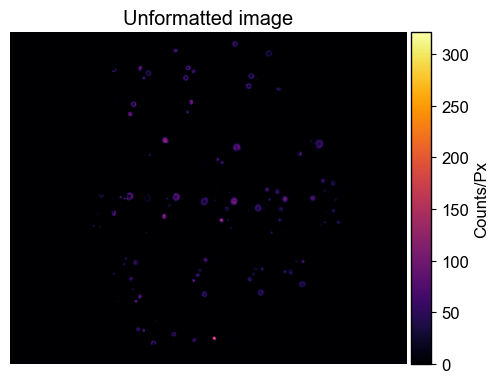

In [4]:
f, ax = plt.subplots(1,1, figsize=(8,4))
im = ax.imshow(cim, cmap='inferno')
ax.axis('off')

cbar = iq.nice_colorbar(im)
cbar.set_label('Counts/Px')

plt.title('Unformatted image')
plt.tight_layout()
plt.show()
plt.close()

This image is *quantitative* but not *calibrated*. That means, the relative uptake in the different parts of the image are accurate with respect to each other. However, without further analysis, we can't know the absolute Activity (Bq or Ci) in the image.

For now though, we want to just check the data and see if it looks ok. It's a little hard to see because the uptake in the mets is so much higher than in the rest of the liver tissue (which is a great result). Let's generate a log-plot of the image so we can see the extent of the tissues.

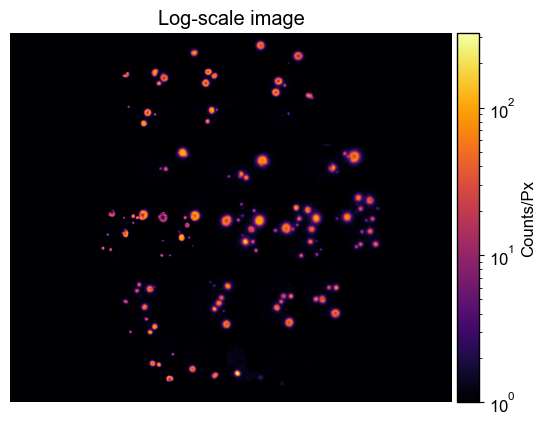

In [5]:
# add threshold below which to black out in log img, then apply to a copy of the img
small_value = np.min(cim[cim > 0])
im_display = np.copy(cim)
im_display[im_display==0] = small_value 

im = plt.imshow(im_display, cmap='inferno', norm=LogNorm())
plt.axis('off')
cbar = iq.nice_colorbar(im)
cbar.set_label('Counts/Px')
plt.title('Log-scale image')
plt.show()

A little better, but still hard to see. How about this - we'll just make the window extremely small.

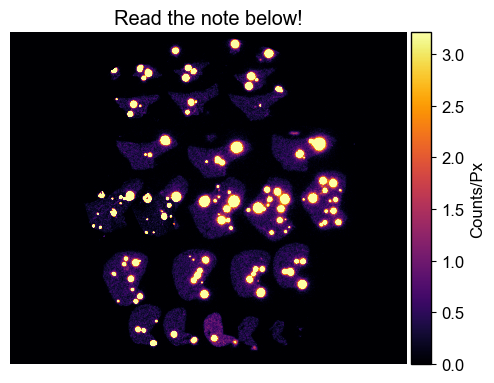

In [6]:
f, ax = plt.subplots(1,1, figsize=(8,4))
im = ax.imshow(cim, cmap='inferno', vmax=0.01*np.max(cim))
ax.axis('off')

cbar = iq.nice_colorbar(im)
cbar.set_label('Counts/Px')

plt.title('Read the note below!')
plt.tight_layout()
plt.show()
plt.close()

<div class="alert alert-block alert-warning">
<b>Warning!</b> Note that now that we've adjusted the window down, the colorbar is <b>no longer accurate.</b> We capped the maximum display at about 3 counts/px, which is much, much less than some pixels had (see the above image, which goes up to >300 counts/px.)
</div>

# Save the image
We can save the image in one of two ways.
1. Save the .tif image to preserve quantitative properties. Use this if you want to analyze in other software or continue to quantitative dosimetry.
2. Save the .png image of the figure we made. Use this if you want to produce a figure for a manuscript, poster, etc.

## 1. Save .tif for analysis

In [7]:
# pick where you want to save the image and its name
# this defaults to the iQID data folder
io.imsave(os.path.join(datdir, "my_tif_image.tif"), cim, plugin='tifffile')

## 2. Save .png for figure
Showing the log-scale image as an example.

In [8]:
# add threshold below which to black out in log img, then apply to a copy of the img
small_value = np.min(cim[cim > 0])
im_display = np.copy(cim)
im_display[im_display==0] = small_value 

im = plt.imshow(im_display, cmap='inferno', norm=LogNorm())
plt.axis('off')
cbar = iq.nice_colorbar(im)
cbar.set_label('Counts/Px')
plt.title('Log-scale image')
plt.tight_layout()

# here is the line to save the figure
# you can adjust the location and settings as desired
plt.savefig(os.path.join(datdir, "my_tif_image.png"), bbox_inches='tight', dpi=300)

# closes the figure without displaying it
plt.close()

# Summary
This notebook showed the basics for loading and simple image construction of iQID listmode data. In the next demo, we'll show how to perform a basic quantitative evaluation of a well-behaved data set, and identify some of the common issues that make a data set not "well-behaved."